# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | weno
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | ariquemes
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | serhetabat
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | tanumah
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | bargara
City not found. Skipping...
Processing Record 40 of Set 4 | san luis de la loma
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | kotlas
Processing Record 45 of Set 4 | glace bay
Processing Record 46 of Set 4 | sironko
Processing Record 47 of Set 4 | punta umbria
Processing Record 48 of Set 4 | yelizovo
Processing Record 49 of Set 4 | selfoss
Processing Record 0 of Set 5 | codrington
Processing Record 1 of Set 5 | severnoye
Processing Record 2 of Set 5 | bechar
Processing Record 3 of Set 5 | el abiodh sidi cheikh
Processing Record 4 of Set 5 | quixada
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | bardai
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | hithadhoo
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | dudinka
Processing Record 11 of Set 5 | margate
Processing Record 12 

Processing Record 30 of Set 8 | buka
Processing Record 31 of Set 8 | cill airne
Processing Record 32 of Set 8 | cariati
Processing Record 33 of Set 8 | mineiros
Processing Record 34 of Set 8 | la passe
Processing Record 35 of Set 8 | el granada
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | sao caetano de odivelas
Processing Record 38 of Set 8 | pacasmayo
Processing Record 39 of Set 8 | lethem
Processing Record 40 of Set 8 | sinabang
Processing Record 41 of Set 8 | nova vicosa
Processing Record 42 of Set 8 | shixing
Processing Record 43 of Set 8 | padangsidempuan
Processing Record 44 of Set 8 | cestos city
Processing Record 45 of Set 8 | deschutes river woods
Processing Record 46 of Set 8 | minas de marcona
Processing Record 47 of Set 8 | general villegas
Processing Record 48 of Set 8 | slavgorod
Processing Record 49 of Set 8 | plouzane
Processing Record 0 of Set 9 | eastham
Processing Record 1 of Set 9 | cockburn town
Processing Record 2 of Set 9 | juegang
P

Processing Record 17 of Set 12 | athens
Processing Record 18 of Set 12 | peace river
Processing Record 19 of Set 12 | tutoia
Processing Record 20 of Set 12 | smithers
Processing Record 21 of Set 12 | ouadda
Processing Record 22 of Set 12 | yarmouth
Processing Record 23 of Set 12 | merritt
Processing Record 24 of Set 12 | akankpa
Processing Record 25 of Set 12 | la sarre
Processing Record 26 of Set 12 | amasra
Processing Record 27 of Set 12 | vanimo
Processing Record 28 of Set 12 | tindouf
Processing Record 29 of Set 12 | rantauprapat
Processing Record 30 of Set 12 | kodinsk
Processing Record 31 of Set 12 | idfu
Processing Record 32 of Set 12 | muisne
Processing Record 33 of Set 12 | tynda
Processing Record 34 of Set 12 | yaren
Processing Record 35 of Set 12 | machiques
Processing Record 36 of Set 12 | puerto quijarro
Processing Record 37 of Set 12 | cedar park
Processing Record 38 of Set 12 | makoua
Processing Record 39 of Set 12 | caconda
Processing Record 40 of Set 12 | bamboo flat
P

In [25]:
city_data_df.head()

,City,Lat,Lng,Max Temp(C),Humidity,Cloudiness,Wind Speed,Country,Date
0,weno,7.4515,151.8468,151.18,70,100,4.63,FM,1701663472
1,isafjordur,66.0755,-23.1240,134.47,85,100,3.96,IS,1701663472
2,edinburgh of the seven seas,-37.0676,-12.3116,142.08,85,2,5.22,SH,1701663472
3,ariquemes,-9.9133,-63.0408,147.65,84,32,0.88,BR,1701663472
4,olonkinbyen,70.9221,-8.7187,134.08,85,36,6.03,SJ,1701663472


In [26]:
# Convert the cities weather data into a Pandas DataFrame
# YOUR CODE HERE

city_data_df = pd.DataFrame(city_data)
city_data_df['Max Temp(C)'] = round((city_data_df['Max Temp'] - 273.15), 2)
city_data_df = city_data_df[['City', 'Lat', 'Lng', 'Max Temp(C)', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]

# Show Record Count
city_data_df.count()

City           587
Lat            587
Lng            587
Max Temp(C)    587
Humidity       587
Cloudiness     587
Wind Speed     587
Country        587
Date           587
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp(C),Humidity,Cloudiness,Wind Speed,Country,Date
0,weno,7.4515,151.8468,30.97,70,100,4.63,FM,1701663472
1,isafjordur,66.0755,-23.1240,0.89,85,100,3.96,IS,1701663472
2,edinburgh of the seven seas,-37.0676,-12.3116,14.59,85,2,5.22,SH,1701663472
3,ariquemes,-9.9133,-63.0408,24.62,84,32,0.88,BR,1701663472
4,olonkinbyen,70.9221,-8.7187,0.20,85,36,6.03,SJ,1701663472


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp(C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,weno,7.4515,151.8468,30.97,70,100,4.63,FM,1701663472
1,isafjordur,66.0755,-23.1240,0.89,85,100,3.96,IS,1701663472
2,edinburgh of the seven seas,-37.0676,-12.3116,14.59,85,2,5.22,SH,1701663472
3,ariquemes,-9.9133,-63.0408,24.62,84,32,0.88,BR,1701663472
4,olonkinbyen,70.9221,-8.7187,0.20,85,36,6.03,SJ,1701663472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

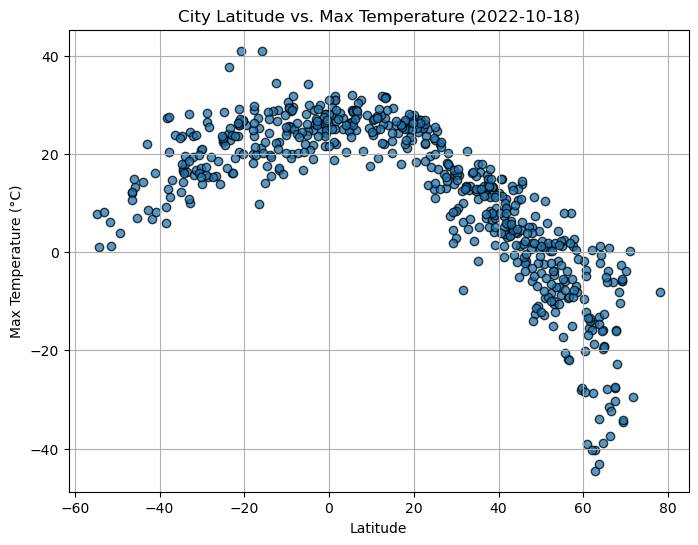

In [35]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp(C)'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

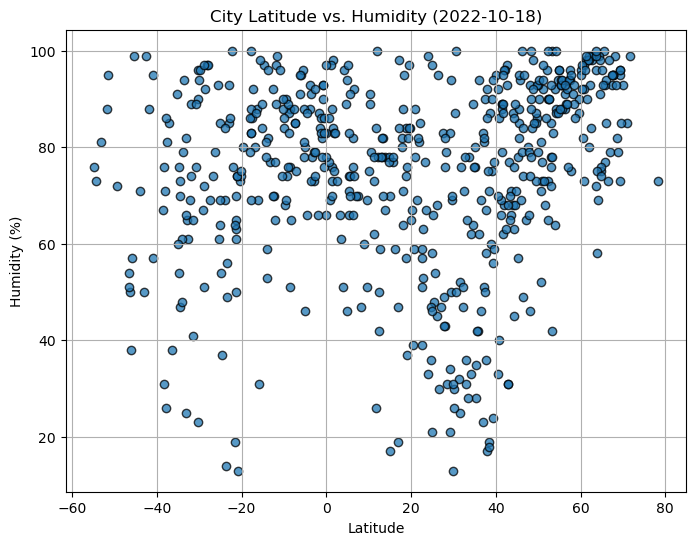

In [36]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

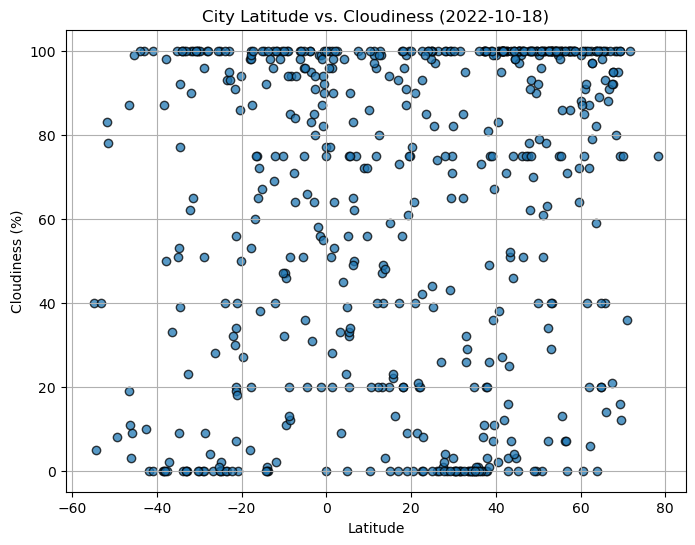

In [37]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

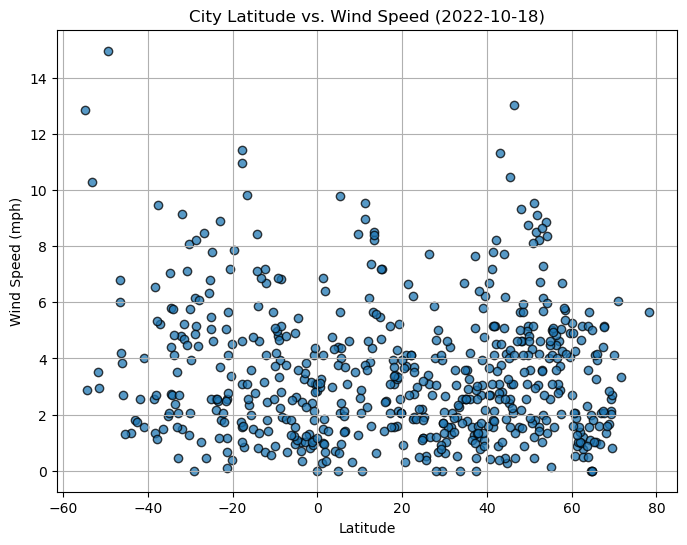

In [38]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}\nR-squared: {round(rvalue**2, 2)}"
    
# Latitude vs. Temperature
plot_linear_regression(city_data_df['Lat'], city_data_df['Max Temp(C)'], 'Latitude', 'Max Temp(C)', 'Latitude vs. Temperature')

# Latitude vs. Humidity
plot_linear_regression(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity', 'Latitude vs. Humidity')

# Latitude vs. Cloudiness
plot_linear_regression(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness')

# Latitude vs. Wind Speed
plot_linear_regression(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed')
    


In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.sample()

,City,Lat,Lng,Max Temp(C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,weno,7.4515,151.8468,30.97,70,100,4.63,FM,1701663472
1,isafjordur,66.0755,-23.1240,0.89,85,100,3.96,IS,1701663472
4,olonkinbyen,70.9221,-8.7187,0.20,85,36,6.03,SJ,1701663472
5,ilulissat,69.2167,-51.1000,-5.99,73,75,2.57,GL,1701663472
8,stanley,54.8680,-1.6985,1.14,96,75,2.57,GB,1701663196


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.sample()

,City,Lat,Lng,Max Temp(C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,14.59,85,2,5.22,SH,1701663472
3,ariquemes,-9.9133,-63.0408,24.62,84,32,0.88,BR,1701663472
6,atafu village,-8.5421,-172.5159,29.45,76,85,6.84,TK,1701663429
7,port mathurin,-19.6833,63.4167,25.80,80,27,7.86,MU,1701663472
10,port-aux-francais,-49.3500,70.2167,3.92,72,8,14.96,TF,1701663340


###  Temperature vs. Latitude Linear Regression Plot

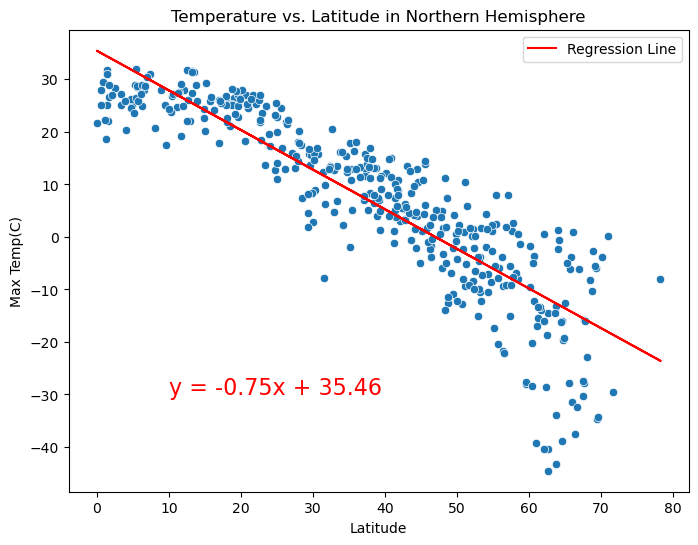

Regression line equation: y = -0.75x + 35.46
R-squared value: 0.78


In [52]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp(C)'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Plotting temperature vs. latitude with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Max Temp(C)'])
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label='Regression Line')

# Adding the regression equation as annotation
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation ,(10,-30),  fontsize=16, color='red')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('Temperature vs. Latitude in Northern Hemisphere')

# Display the plot with legend
plt.legend()
plt.show()

# Print the regression line equation and R-squared value
print(f"Regression line equation: y = {round(slope, 2)}x + {round(intercept, 2)}")
print(f"R-squared value: {round(rvalue**2, 2)}")





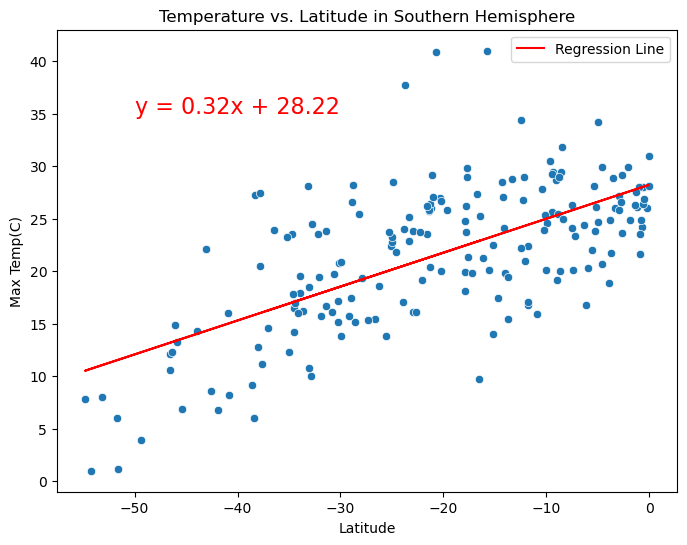

R-squared value Southern Hemisphere: 0.42


In [55]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

slope_south, intercept_south, rvalue_south, pvalue_south, stderr_south = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp(C)'])

# Calculate the regression line
regress_values_south = slope_south * southern_hemi_df['Lat'] + intercept_south

# Plotting temperature vs. latitude with regression line for Southern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Max Temp(C)'])
plt.plot(southern_hemi_df['Lat'], regress_values_south, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('Temperature vs. Latitude in Southern Hemisphere')

# Adding the regression equation as annotation
equation_south = f"y = {round(slope_south, 2)}x + {round(intercept_south, 2)}"
plt.annotate(equation_south, (-50,35), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

# Print the R-squared value
print(f"R-squared value Southern Hemisphere: {round(rvalue_south**2, 2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

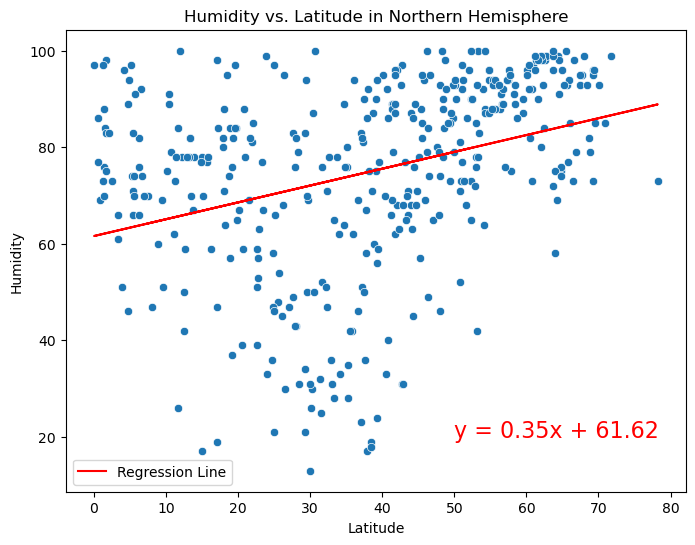

R-squared value Northern Hemisphere (Humidity): 0.11


In [79]:
# Northern Hemisphere
# YOUR CODE HERE

# Perform linear regression for Northern Hemisphere latitude vs. Humidity
slope_humidity_north, intercept_humidity_north, rvalue_humidity_north, pvalue_humidity_north, stderr_humidity_north = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate the regression line
regress_values_humidity_north = slope_humidity_north * northern_hemi_df['Lat'] + intercept_humidity_north

# Plotting humidity vs. latitude with regression line for Northern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], regress_values_humidity_north, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Northern Hemisphere')

# Adding the regression equation as annotation
equation_humidity_north = f"y = {round(slope_humidity_north, 2)}x + {round(intercept_humidity_north, 2)}"
plt.annotate(equation_humidity_north, (50,20), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

# Print the R-squared value
print(f"R-squared value Northern Hemisphere (Humidity): {round(rvalue_humidity_north**2, 2)}")


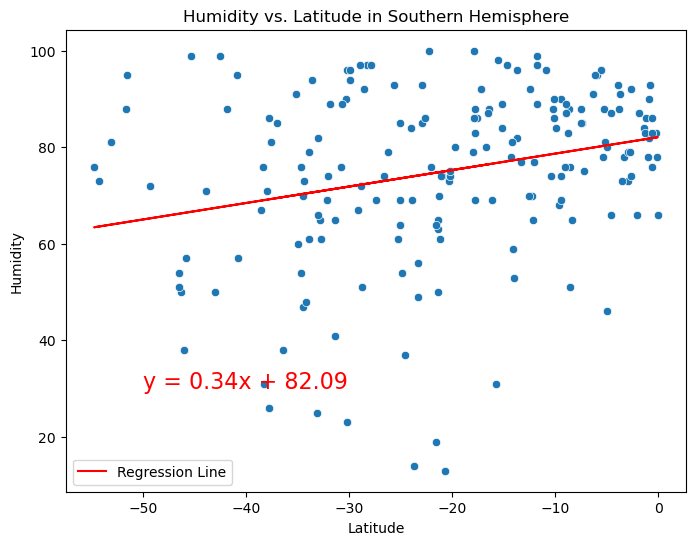

R-squared value Southern Hemisphere (Humidity): 0.07


In [82]:
# Southern Hemisphere
# YOUR CODE HERE

slope_humidity_south, intercept_humidity_south, rvalue_humidity_south, pvalue_humidity_south, stderr_humidity_south = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate the regression line
regress_values_humidity_south = slope_humidity_south * southern_hemi_df['Lat'] + intercept_humidity_south

# Plotting humidity vs. latitude with regression line for Southern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], regress_values_humidity_south, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Southern Hemisphere')

# Adding the regression equation as annotation
equation_humidity_south = f"y = {round(slope_humidity_south, 2)}x + {round(intercept_humidity_south, 2)}"
plt.annotate(equation_humidity_south, (-50,30), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

# Print the R-squared value
print(f"R-squared value Southern Hemisphere (Humidity): {round(rvalue_humidity_south**2, 2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

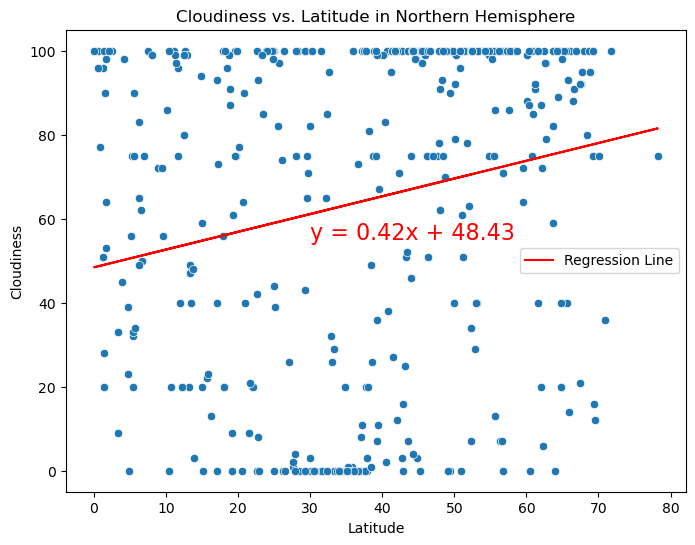

R-squared value Northern Hemisphere (Cloudiness): 0.05


In [65]:
# Northern Hemisphere
# YOUR CODE HERE

slope_cloudiness, intercept_cloudiness, rvalue_cloudiness, pvalue_cloudiness, stderr_cloudiness = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate the regression line
regress_values_cloudiness = slope_cloudiness * northern_hemi_df['Lat'] + intercept_cloudiness

# Plotting cloudiness vs. latitude with regression line for Northern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], regress_values_cloudiness, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in Northern Hemisphere')

# Adding the regression equation as annotation
equation_cloudiness = f"y = {round(slope_cloudiness, 2)}x + {round(intercept_cloudiness, 2)}"
plt.annotate(equation_cloudiness, (30,55), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

# Print the R-squared value
print(f"R-squared value Northern Hemisphere (Cloudiness): {round(rvalue_cloudiness**2, 2)}")

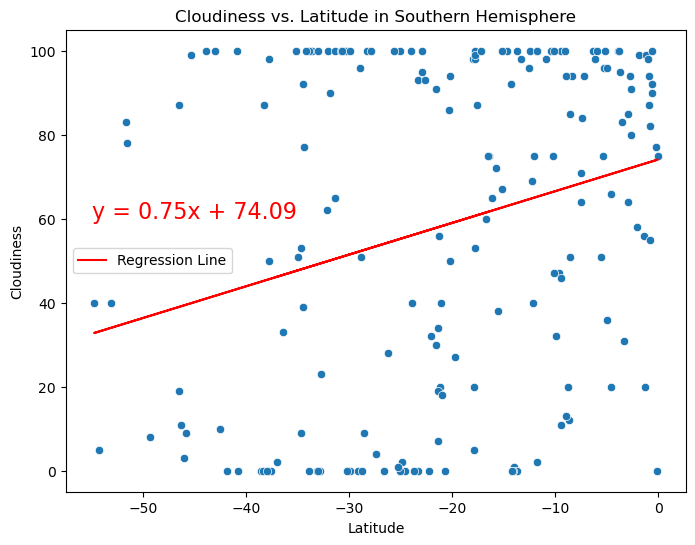

R-squared value Southern Hemisphere (Cloudiness): 0.07


In [70]:
# Southern Hemisphere
# YOUR CODE HERE

slope_cloudiness_south, intercept_cloudiness_south, rvalue_cloudiness_south, pvalue_cloudiness_south, stderr_cloudiness_south = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate the regression line
regress_values_cloudiness_south = slope_cloudiness_south * southern_hemi_df['Lat'] + intercept_cloudiness_south

# Plotting cloudiness vs. latitude with regression line for Southern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], regress_values_cloudiness_south, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in Southern Hemisphere')

# Adding the regression equation as annotation
equation_cloudiness_south = f"y = {round(slope_cloudiness_south, 2)}x + {round(intercept_cloudiness_south, 2)}"
plt.annotate(equation_cloudiness_south, (-55,60), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

# Print the R-squared value
print(f"R-squared value Southern Hemisphere (Cloudiness): {round(rvalue_cloudiness_south**2, 2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

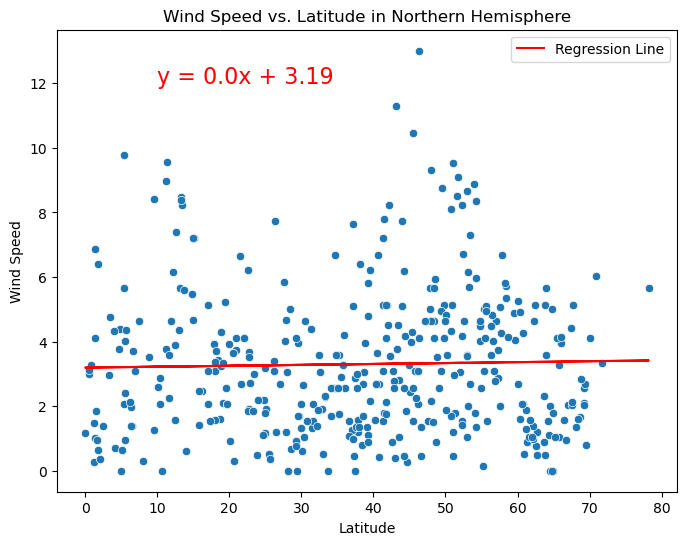

In [73]:
# Northern Hemisphere
# YOUR CODE HERE

slope_wind, intercept_wind, rvalue_wind, pvalue_wind, stderr_wind = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate the regression line
regress_values_wind = slope_wind * northern_hemi_df['Lat'] + intercept_wind

# Plotting wind speed vs. latitude with regression line for Northern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], regress_values_wind, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude in Northern Hemisphere')

# Adding the regression equation as annotation
equation_wind = f"y = {round(slope_wind, 2)}x + {round(intercept_wind, 2)}"
plt.annotate(equation_wind, (10,12), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

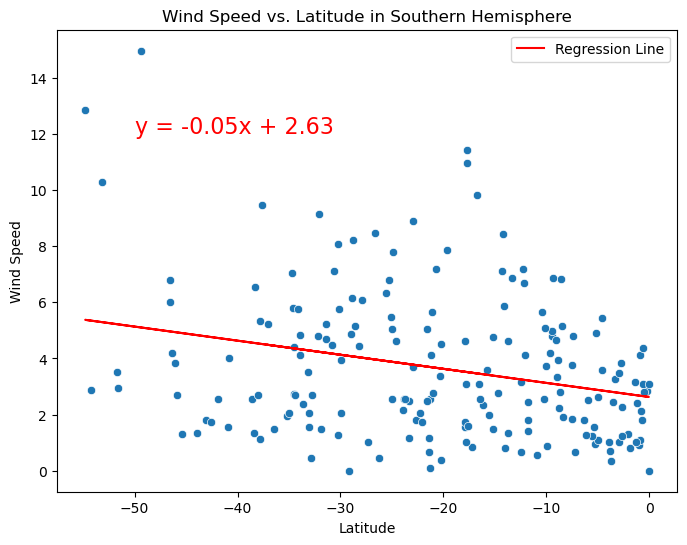

R-squared value Southern Hemisphere (Wind Speed): 0.07


In [75]:
# Southern Hemisphere
# YOUR CODE HERE

slope_wind_south, intercept_wind_south, rvalue_wind_south, pvalue_wind_south, stderr_wind_south = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate the regression line
regress_values_wind_south = slope_wind_south * southern_hemi_df['Lat'] + intercept_wind_south

# Plotting wind speed vs. latitude with regression line for Southern Hemisphere
plt.figure(figsize=(8, 6))
sns.scatterplot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], regress_values_wind_south, "r-", label='Regression Line')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude in Southern Hemisphere')

# Adding the regression equation as annotation
equation_wind_south = f"y = {round(slope_wind_south, 2)}x + {round(intercept_wind_south, 2)}"
plt.annotate(equation_wind_south, (-50, 12), fontsize=16, color='red')

# Display the plot with legend
plt.legend()
plt.show()

# Print the R-squared value
print(f"R-squared value Southern Hemisphere (Wind Speed): {round(rvalue_wind_south**2, 2)}")


**Discussion about the linear relationship:** 
The Temperature vs. Latitude:
In general, there tends to be a clear correlation between temperature and latitude. As you move away from the equator towards the poles (higher latitudes), temperatures typically drop. The linear regression plot might show a negative slope, indicating that as latitude increases (moving away from the equator), the temperature decreases.

Humidity vs. Latitude:
The relationship might not be as straightforward as temperature. Humidity levels can be influenced by various factors beyond latitude alone, such as proximity to bodies of water, prevailing winds, and local geography. The linear regression might not show a strong correlation or could potentially show a scattered distribution of points.

Cloudiness vs. Latitude:
Cloudiness might not exhibit a significant linear relationship with latitude. Cloud cover can be influenced by local weather patterns, topography, and atmospheric conditions rather than latitude alone. The linear regression might not indicate a clear trend.

Wind Speed vs. Latitude:
Could show some variation. While latitude itself may not directly influence wind speed, it can indirectly affect it due to the Earth's rotation and atmospheric circulation patterns. Near the poles, there might be stronger winds due to the temperature gradients, whereas closer to the equator, the winds might be more influenced by local weather systems. The linear regression plot might show some variability in wind speeds concerning latitude.